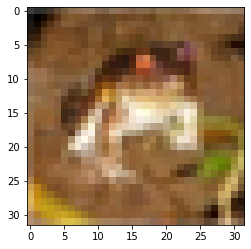

[6]


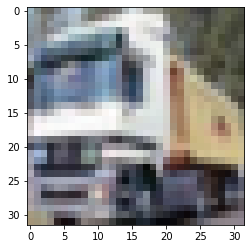

[9]


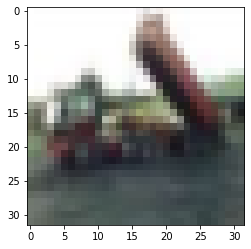

[9]


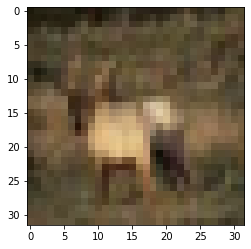

[4]


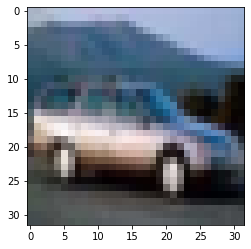

[1]


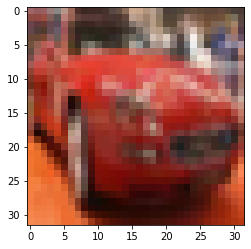

[1]


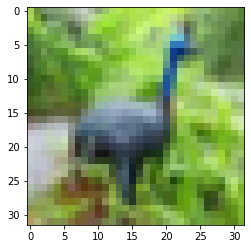

[2]


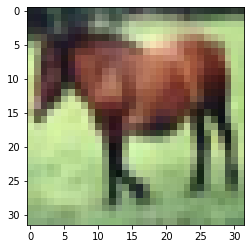

[7]


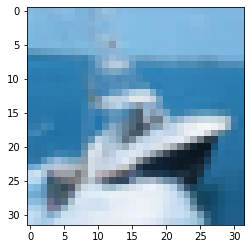

[8]


In [24]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import Sequential
from skimage import color

(x_train, y_train),(x_test,y_test) = cifar10.load_data()
x = x_test

for i in range (9):
    #plt.subplot(330+i+1) # 3 hàng, 3 cột
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

In [25]:
# Dat ten cho cac classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [26]:
#chuyen hinh anh ve mau gray 
x_train = color.rgb2gray(x_train)
y_train = color.rgb2gray(y_train)
x_test = color.rgb2gray(x_test)
y_test = color.rgb2gray(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


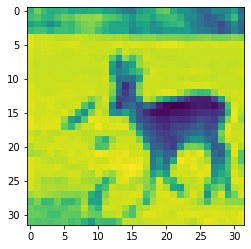

[4]


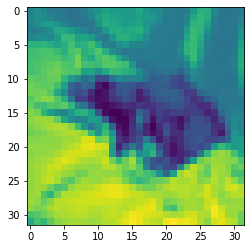

[3]


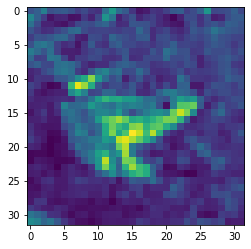

[6]


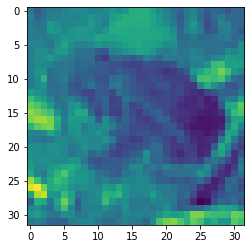

[6]


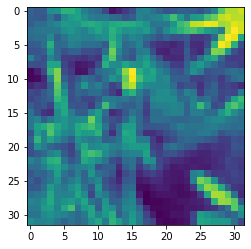

[2]


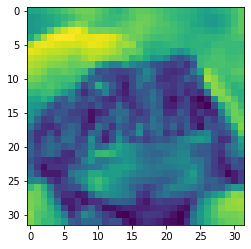

[6]


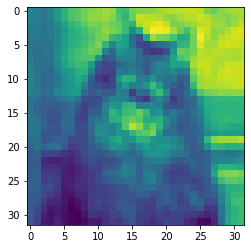

[3]


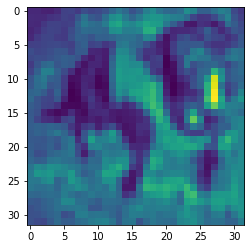

[5]


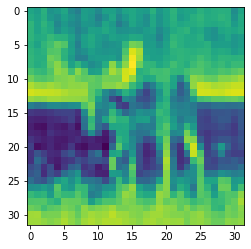

[4]


In [27]:
for i in range (9):
    #plt.subplot(330+i+1) # 3 hàng, 3 cột
    plt.imshow(x_train[20+i])
    plt.show()
    print(y_train[20+i])

In [28]:
  x_train = x_train.reshape(50000,1024) 
  x_test = x_test.reshape(10000,1024)
  # Normalize inputs from 0-255 to 0-1
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train/= 255 
  x_test/= 255

In [29]:
y_train = to_categorical(y_train,10) 
y_test = to_categorical(y_test,10)

In [30]:
# Model ANN
model = Sequential()
# input
model.add(Dense(512, activation ='relu', input_shape = (1024,)))
model.add(Dropout(0.2))
#1
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
#2
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
# output
model.add(Dense(10, activation = 'softmax')) # => Output
model.add(Dropout(0.1))

In [31]:
model.summary()
model.compile( loss='categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy']) 
history = model.fit(x_train, y_train, batch_size = 128, epochs = 100, verbose = 1, validation_data = (x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [32]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss =',score[0])
print('Test accuracy =',score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.5971 - accuracy: 0.4600
Test loss = 1.5971348285675049
Test accuracy = 0.46000000834465027


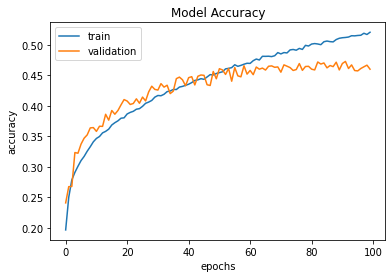

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper left')

In [35]:
y_pred = model.predict(x_test)

# Tạo một index và dự đoán 
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_index]
y_sample_classes = y_pred[random_index]

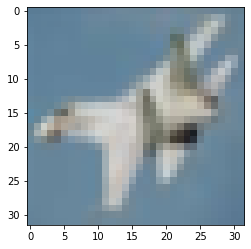

airplane


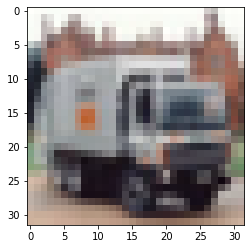

truck


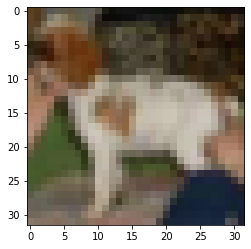

airplane


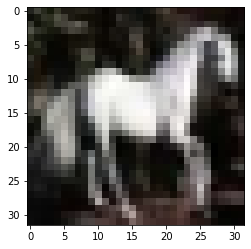

airplane


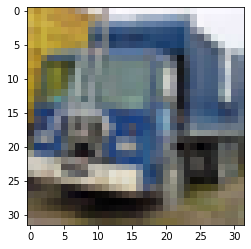

truck


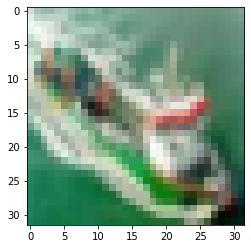

ship


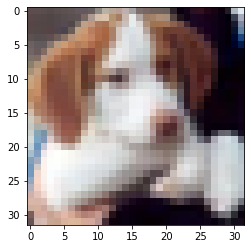

dog


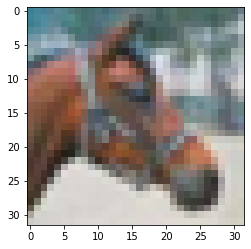

airplane


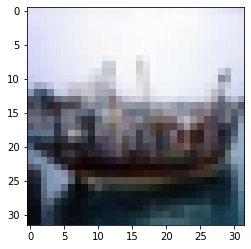

ship


In [37]:
y_pred=model.predict(x_test)
for i in range(9):
  #plt.subplot(330+i+1) #330: 3 hang 3 cot, stt di tu trai sang phai tren duoi,i=0 thi 331 phan tu tuong tac la so 1
  plt.imshow(x[10+i])
  plt.show()
  #print(np.round(y_pred[i]))
  print(classes[np.argmax(np.round(y_pred[10+i]))])

In [38]:
model.save('cifar10(ANN).h5')